In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,nltk
import tensorflow.keras.backend as K

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data =pd.read_excel('/content/drive/MyDrive/News/Our/Dataset.xlsx')
data.head()

,headlines,category,time
0,আ.লীগের সাধারণ সম্পাদক পদে ওবায়দুল কাদেরের হ্য...,politics,২৪ ডিসেম্বর ২০২২
1,"আবারও শেখ হাসিনা আওয়ামী লীগের সভাপতি, ওবায়দুল ...",politics,২৪ ডিসেম্বর ২০২২
2,আওয়ামী লীগের সম্মেলনের দ্বিতীয় অধিবেশন চলছে,politics,২৪ ডিসেম্বর ২০২২
3,ক্ষমতার মঞ্চে শেখ হাসিনার বিকল্প নেই: ওবায়দুল ...,politics,২৪ ডিসেম্বর ২০২২
4,আওয়ামী লীগকে জনগণের প্রতিষ্ঠানে পরিণত করেন বঙ্...,politics,২৪ ডিসেম্বর ২০২২


In [4]:
data['category'].replace([0,1,2,3,4,5,6],['politics','International','economics','sports','entertainment','technology','coronavirus'],inplace=True)
data.groupby('category').size().reset_index(name='counts')

,category,counts
0,coronavirus,2111
1,economics,1823
2,entertainment,2036
3,international,2037
4,politics,2000
5,sports,2015
6,technology,2028


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14050 entries, 0 to 14049
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  14050 non-null  object
 1   category   14050 non-null  object
 2   time       14050 non-null  object
dtypes: object(3)
memory usage: 329.4+ KB


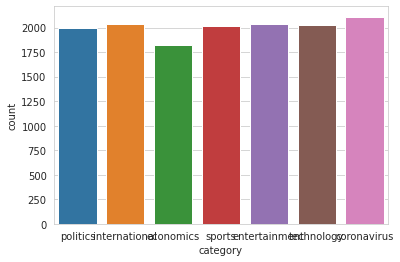

In [6]:
sns.set_style('whitegrid')
sns.countplot(x = 'category', data = data)

In [7]:
def process_sentences(Sentence): 
    Sentence = re.sub('[^\u0980-\u09FF]',' ',Sentence)
    Sentence = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', Sentence)
    Sentence = re.sub(r'(\W)(?=\1)', '', Sentence)
    Sentence = re.sub(r'https?:\/\/.*[\r\n]*', '', Sentence, flags=re.MULTILINE)
    Sentence = re.sub(r'\<a href', ' ', Sentence)
    Sentence = re.sub(r'&amp;', '', Sentence) 
    Sentence = re.sub(r'<br />', ' ', Sentence)
    Sentence = re.sub(r'\'', ' ', Sentence)
    Sentence = re.sub(r'ߑͰߑ̰ߒנ', '', Sentence)
    Sentence = re.sub(r'ߎɰߎɰߎɍ', '', Sentence)
    return Sentence

In [8]:
data['headlines'] = data['headlines'].apply(process_sentences)  
data

,headlines,category,time
0,আ লীগের সাধারণ সম্পাদক পদে ওবায়দুল কাদেরের হ্য...,politics,২৪ ডিসেম্বর ২০২২
1,আবারও শেখ হাসিনা আওয়ামী লীগের সভাপতি ওবায়দুল ক...,politics,২৪ ডিসেম্বর ২০২২
2,আওয়ামী লীগের সম্মেলনের দ্বিতীয় অধিবেশন চলছে,politics,২৪ ডিসেম্বর ২০২২
3,ক্ষমতার মঞ্চে শেখ হাসিনার বিকল্প নেই ওবায়দুল ক...,politics,২৪ ডিসেম্বর ২০২২
4,আওয়ামী লীগকে জনগণের প্রতিষ্ঠানে পরিণত করেন বঙ্...,politics,২৪ ডিসেম্বর ২০২২
...,...,...,...
14045,অত্যাধুনিক প্রযুক্তির ফ্ল্যাগশিপ ফোন আনলো ওয়ালটন,technology,১৮ জানুয়ারি ২০২২
14046,মেগাপিক্সেল ক্যামেরার স্মার্টফোন আনছে মটোরোলা,technology,১৮ জানুয়ারি ২০২২
14047,অ্যাপল ও গুগলের বিরুদ্ধে মামলা পাবজি নির্মাতার,technology,১৮ জানুয়ারি ২০২২
14048,শিক্ষার্থীদের অনলাইন পড়ালেখা সহজ করবে প্যাড ট...,technology,১৭ জানুয়ারি ২০২২


In [9]:
# Remove the Text with least words
data['length'] = data['headlines'].apply(lambda x:len(x.split()))
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Text".format(len(data)-len(dataset)),
      "\nTotal Text:",len(dataset))

After Cleaning: 
Removed 0 Small Text 
Total Text: 14050


In [10]:
dataset

,headlines,category,time,length
0,আ লীগের সাধারণ সম্পাদক পদে ওবায়দুল কাদেরের হ্য...,politics,২৪ ডিসেম্বর ২০২২,8
1,আবারও শেখ হাসিনা আওয়ামী লীগের সভাপতি ওবায়দুল ক...,politics,২৪ ডিসেম্বর ২০২২,10
2,আওয়ামী লীগের সম্মেলনের দ্বিতীয় অধিবেশন চলছে,politics,২৪ ডিসেম্বর ২০২২,6
3,ক্ষমতার মঞ্চে শেখ হাসিনার বিকল্প নেই ওবায়দুল ক...,politics,২৪ ডিসেম্বর ২০২২,8
4,আওয়ামী লীগকে জনগণের প্রতিষ্ঠানে পরিণত করেন বঙ্...,politics,২৪ ডিসেম্বর ২০২২,9
...,...,...,...,...
14045,অত্যাধুনিক প্রযুক্তির ফ্ল্যাগশিপ ফোন আনলো ওয়ালটন,technology,১৮ জানুয়ারি ২০২২,6
14046,মেগাপিক্সেল ক্যামেরার স্মার্টফোন আনছে মটোরোলা,technology,১৮ জানুয়ারি ২০২২,5
14047,অ্যাপল ও গুগলের বিরুদ্ধে মামলা পাবজি নির্মাতার,technology,১৮ জানুয়ারি ২০২২,7
14048,শিক্ষার্থীদের অনলাইন পড়ালেখা সহজ করবে প্যাড ট...,technology,১৭ জানুয়ারি ২০২২,7


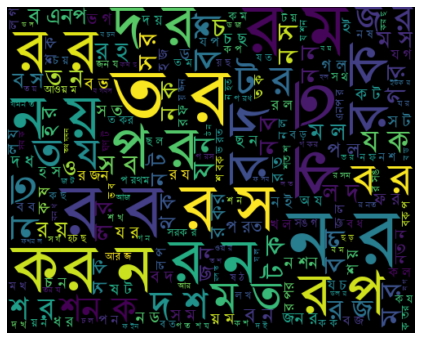

In [11]:
from wordcloud import WordCloud 
allWords = ' '.join([comnt for comnt in data['headlines']])
wordCloud = WordCloud(font_path='/content/drive/MyDrive/News/Our/Nikosh/Nikosh.ttf', width =500, height =400, random_state = 21, max_font_size = 119).generate(allWords)

fig = plt.figure(1, figsize=(10, 6))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [12]:
def data_summary(dataset):

    documents = []
    words = []
    u_words = []
    vocab_size = []
    total_u_words = [word.strip().lower() for t in list(dataset.headlines) for word in t.strip().split()]
    class_label= [k for k,v in dataset.category.value_counts().to_dict().items()]
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.category==label].headlines) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.category==label].headlines)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.category==label].headlines))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
    vocab_size = (len(np.unique(total_u_words)))
    
    return documents,words,u_words,class_label,vocab_size

documents,words,u_words,class_names,vocab_size = data_summary(dataset)   


Class Name :  coronavirus
Number of Documents:2111
Number of Words:12999
Number of Unique Words:1492
Most Frequent Words:

মৃত্যু	768
শনাক্ত	732
করোনায়	634
করোনা	592
জনের	433
বিভাগে	347
শনাক্তের	211
ঘণ্টায়	193
হার	189
নেই	162

Class Name :  international
Number of Documents:2037
Number of Words:12698
Number of Unique Words:3449
Most Frequent Words:

নিহত	200
থেকে	82
ও	70
রাশিয়া	67
হামলা	64
রুশ	63
সঙ্গে	62
নতুন	59
যুক্তরাষ্ট্র	56
রাশিয়ার	55

Class Name :  entertainment
Number of Documents:2036
Number of Words:11938
Number of Unique Words:3134
Most Frequent Words:

নিয়ে	128
না	107
শাকিব	72
নতুন	70
সঙ্গে	68
র	65
বললেন	53
পর	52
থেকে	49
এবার	46

Class Name :  technology
Number of Documents:2028
Number of Words:13387
Number of Unique Words:3333
Most Frequent Words:

নতুন	130
ই	96
না	90
মোবাইল	90
যেভাবে	87
হবে	83
ফেসবুক	83
পলক	75
ও	73
থেকে	69

Class Name :  sports
Number of Documents:2015
Number of Words:11485
Number of Unique Words:2316
Most Frequent Words:

বিশ্বকাপ	128
আর্জেন্টিনা	114
থেক

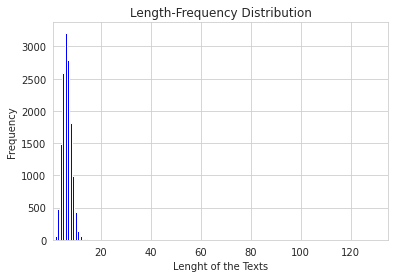

Maximum Length of a Text: 15
Minimum Length of a Text: 1
Average Length of a Text: 6.0


In [13]:
# Calculate the Text of each of the Text
dataset['TextLength'] = dataset.headlines.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.TextLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Text: {max(dataset.TextLength)}")
print(f"Minimum Length of a Text: {min(dataset.TextLength)}")
print(f"Average Length of a Text: {round(np.mean(dataset.TextLength),0)}")
max_len = max(dataset.TextLength)

In [15]:
from keras.preprocessing import sequence, text
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

tokenizer = text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(dataset.headlines)

X = tokenizer.texts_to_sequences(dataset.headlines)

print('Before Tokenization & Padding \n', dataset.headlines[0])

feature = pad_sequences(X, maxlen=max_len)

print('After Tokenization & Padding \n', feature[0])

Before Tokenization & Padding 
 আ লীগের সাধারণ সম্পাদক পদে ওবায়দুল কাদেরের হ্যাটট্রিক
After Tokenization & Padding 
 [   0    0    0    0    0    0    0 5738   52  616 1001 1458  172  486
 3042]


In [16]:
import tensorflow
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
import keras.layers as layers
from keras import regularizers
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from keras.callbacks import History
from keras import models
from keras import losses
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

In [17]:
le = LabelEncoder()

labels = le.fit_transform(dataset.category)

labels = to_categorical(labels)

In [18]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(feature, labels, test_size=0.2, random_state=42)

assert X_valid_emb.shape[0] == y_valid_emb.shape[0]
assert X_train_emb.shape[0] == y_train_emb.shape[0]

print('Shape of Train set:',X_train_emb.shape)
print('Shape of Validation set:',X_valid_emb.shape)

Shape of Train set: (11240, 15)
Shape of Validation set: (2810, 15)


In [19]:
embedding_size = 32
epochs = 10

In [20]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [21]:
def get_model():

    model = models.Sequential()
    model.add(layers.Embedding(vocab_size, embedding_size, input_length=max_len))
    model.add(layers.Conv1D(128, 5, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(7, activation='softmax'))

    model.summary()

    model.compile(optimizer='rmsprop'
              , loss='categorical_crossentropy'
              , metrics=['accuracy', precision, recall])
    
    return model

In [22]:
model = get_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 32)            397472    
                                                                 
 conv1d (Conv1D)             (None, 11, 128)           20608     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 7)                 77        
                                                                 
Total params: 419,447
Trainable params: 419,447
Non-trainable params: 0
__________________________________________________

In [23]:
history = model.fit(X_train_emb
                    , y_train_emb
                    , epochs=epochs
                    , batch_size=64
                    , validation_data=(X_valid_emb, y_valid_emb)
                    , verbose=1)

Epoch 1/10
176/176 [==============================] - 4s 13ms/step - loss: 1.6183 - accuracy: 0.3735 - precision: 0.6405 - recall: 0.0747 - val_loss: 1.1735 - val_accuracy: 0.6826 - val_precision: 0.9715 - val_recall: 0.2005
Epoch 2/10
176/176 [==============================] - 2s 11ms/step - loss: 0.7269 - accuracy: 0.8190 - precision: 0.9557 - recall: 0.5667 - val_loss: 0.5635 - val_accuracy: 0.8267 - val_precision: 0.9192 - val_recall: 0.7460
Epoch 3/10
176/176 [==============================] - 2s 10ms/step - loss: 0.3192 - accuracy: 0.9175 - precision: 0.9497 - recall: 0.8832 - val_loss: 0.3858 - val_accuracy: 0.8779 - val_precision: 0.9199 - val_recall: 0.8552
Epoch 4/10
176/176 [==============================] - 2s 14ms/step - loss: 0.1739 - accuracy: 0.9531 - precision: 0.9667 - recall: 0.9409 - val_loss: 0.3316 - val_accuracy: 0.9004 - val_precision: 0.9272 - val_recall: 0.8809
Epoch 5/10
176/176 [==============================] - 2s 11ms/step - loss: 0.1056 - accuracy: 0.9707

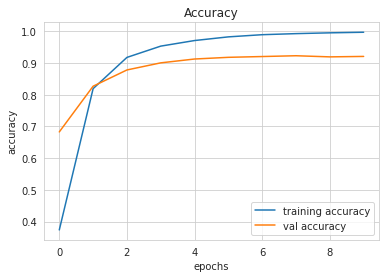

In [24]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

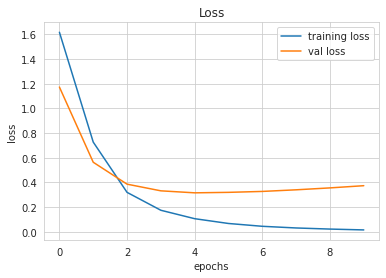

In [25]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [26]:
train_score = model.evaluate(X_train_emb, y_train_emb, verbose=0)
print('Train accuracy:', train_score[1])

Train accuracy: 0.9988434314727783


In [27]:
test_score = model.evaluate(X_valid_emb, y_valid_emb, verbose=0)
print('Test accuracy:', test_score[1])

Test accuracy: 0.9206405878067017


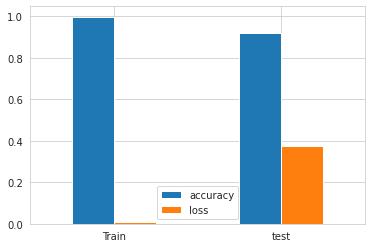

In [28]:
accuracy = [train_score[1], test_score[1]]
loss = [train_score[0], test_score[0]]
index = ['Train', 'test']
df = pd.DataFrame({'accuracy': accuracy,
                   'loss': loss}, index=index)
ax = df.plot.bar(rot=0)

In [29]:
# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_valid_emb, y_valid_emb, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))

def f1_score(precision, recall):
    
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9206
Precision : 0.9265
Recall    : 0.9169
F1 Score  : 0.9217


88/88 [==============================] - 0s 2ms/step


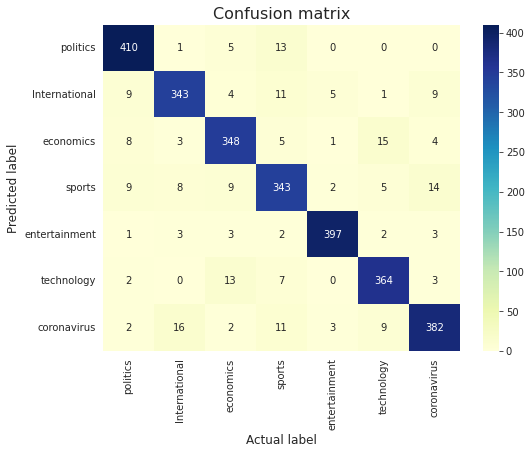

In [30]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_test, y_test):

    classes = ['politics','International','economics','sports','entertainment','technology','coronavirus']

    y_pred = model.predict(X_test)

    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.YlGnBu, annot=True, fmt='d',
                xticklabels=classes,
                yticklabels=classes)
    
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    
plot_confusion_matrix(model, X_valid_emb, y_valid_emb)